# Regression Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

In [9]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')

# Replace NAN in Numerical Variables
df['LotFrontage'] = df['LotFrontage'].interpolate()

# Replace NAN in Categorical Variables. 
df = df.fillna('Na')

# Find all columns where values are variables. 
ob_columns = df.select_dtypes(include='object').columns.tolist()
# Change those columns to categories, then use .cat.codes to encode them to int8
for col in ob_columns:     # 
    df[col+'Cat'] = df[col].astype('category').cat.codes
    
# Create a new Dataframe with only numbers to feed a model
num_df = df.select_dtypes(include = 'number')

num_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoningCat,StreetCat,AlleyCat,LotShapeCat,LandContourCat,UtilitiesCat,LotConfigCat,LandSlopeCat,NeighborhoodCat,Condition1Cat,Condition2Cat,BldgTypeCat,HouseStyleCat,RoofStyleCat,RoofMatlCat,Exterior1stCat,Exterior2ndCat,MasVnrTypeCat,MasVnrAreaCat,ExterQualCat,ExterCondCat,FoundationCat,BsmtQualCat,BsmtCondCat,BsmtExposureCat,BsmtFinType1Cat,BsmtFinType2Cat,HeatingCat,HeatingQCCat,CentralAirCat,ElectricalCat,KitchenQualCat,FunctionalCat,FireplaceQuCat,GarageTypeCat,GarageYrBltCat,GarageFinishCat,GarageQualCat,GarageCondCat,PavedDriveCat,PoolQCCat,FenceCat,MiscFeatureCat,SaleTypeCat,SaleConditionCat
0,1,60,65.0,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,3,1,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,128,2,4,2,2,4,4,2,6,1,0,1,5,2,6,3,1,89,2,5,5,2,3,4,1,8,4
1,2,20,80.0,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,3,1,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3,0,3,4,1,2,4,1,0,6,1,0,1,5,3,6,5,1,62,2,5,5,2,3,4,1,8,4
2,3,60,68.0,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,3,1,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,104,2,4,2,2,4,2,2,6,1,0,1,5,2,6,5,1,87,2,5,5,2,3,4,1,8,4
3,4,70,60.0,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,3,1,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3,0,3,4,0,4,1,4,0,6,1,2,1,5,2,6,2,5,84,3,5,5,2,3,4,1,8,0
4,5,60,84.0,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,3,1,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,221,2,4,2,2,4,0,2,6,1,0,1,5,2,6,5,1,86,2,5,5,2,3,4,1,8,4


## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

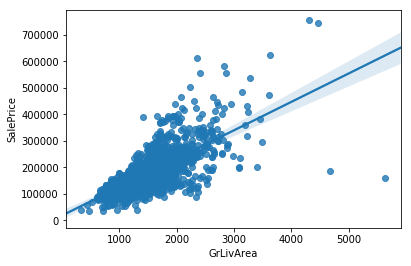

In [11]:
sns.regplot(num_df['GrLivArea'], num_df['SalePrice'])

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [12]:
features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
            'YearRemodAdd','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF',
            '1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath',
            'BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
            'GarageArea','WoodDeckSF','OpenPorchSF','NeighborhoodCat',
            'MasVnrAreaCat','ExterCondCat','BsmtFinType2Cat','CentralAirCat',
            'FunctionalCat','GarageTypeCat']
target = ['SalePrice']

## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

In [13]:
X = num_df[features]
y = num_df[target]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     208.6
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        19:36:48   Log-Likelihood:                -17357.
No. Observations:                1460   AIC:                         3.477e+04
Df Residuals:                    1431   BIC:                         3.493e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.195e+06   1.35e+05     

The P-Values indicate whether a feature is likely to be a meaningful addition to a model. If it is low (<0.05) it is **more** likely to be a meaningful addition to the model because changes in the predictor's value are related to changes in the response variable. 

High P-Value Features are: 
> 
>- BsmtFinSF1
>- BsmtUnfSF
>- TotalBsmtSF
>- 1stFlrSF
>- 2ndFlrSF
>- GrLivArea
>- FullBath
>- GarageArea
>- OpenPorchSF
>- ExterCondCat
>- BsmtFinType2Cat
>- CentralAirCat

At This point, I realize I am working with too many features to efficiently complete this assignment. I am going to use remove these features. This should improve the fit of my model and give me less things to track. 

In [14]:
features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
            'YearRemodAdd','GrLivArea','BsmtFullBath','BedroomAbvGr',
            'TotRmsAbvGrd','Fireplaces','GarageCars','WoodDeckSF',
            'NeighborhoodCat','MasVnrAreaCat','FunctionalCat','GarageTypeCat']
target = ['SalePrice']

X = num_df[features]
y = num_df[target]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     326.8
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        19:36:48   Log-Likelihood:                -17391.
No. Observations:                1460   AIC:                         3.482e+04
Df Residuals:                    1442   BIC:                         3.491e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.135e+06   1.24e+05     

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [15]:
#Removes any observations where a value has a zscore of 3 or more. 
#ZScore refers to number of standard deviations from the mean. 
num_df = num_df[np.abs(stats.zscore(num_df)< 3).all(axis=1)]

In [17]:
print(df.shape)
print(num_df.shape)

(1460, 126)
(891, 81)


In [18]:
X = num_df[features]
y = num_df[target]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     353.8
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        19:36:57   Log-Likelihood:                -10237.
No. Observations:                 891   AIC:                         2.051e+04
Df Residuals:                     873   BIC:                         2.060e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.064e+06   1.11e+05     

Features with large changes in coefficient:

>- LotFrontage
>- TotRmsAbvGrd
>- Fireplaces
>- MasVnrAreaCat
>- FunctionalCat
>- GarageTypeCat

FunctionalCat and GarageTypeCat seem to move the most. That is likely due to a lot of outliers in the original data. 

## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [19]:
num_df['ln_SalesPrice'] = np.log(num_df['SalePrice'])

In [20]:
features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
            'YearRemodAdd','GrLivArea','BsmtFullBath','BedroomAbvGr',
            'TotRmsAbvGrd','Fireplaces','GarageCars','WoodDeckSF',
            'NeighborhoodCat','MasVnrAreaCat','FunctionalCat','GarageTypeCat']
target = ['ln_SalesPrice']

X = num_df[features]
y = num_df[target]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          ln_SalesPrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     445.2
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        19:36:58   Log-Likelihood:                 624.80
No. Observations:                 891   AIC:                            -1214.
Df Residuals:                     873   BIC:                            -1127.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.2142      0.563     

## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
X = sm.add_constant(X)
vif = ([variance_inflation_factor(X.values,i) for i in range (len(X.columns))])
pd.Series(vif, X.columns)

const              19178.641569
LotFrontage            1.609714
LotArea                1.756839
OverallQual            3.171857
OverallCond            1.453190
YearBuilt              3.917960
YearRemodAdd           2.391683
GrLivArea              4.928412
BsmtFullBath           1.105128
BedroomAbvGr           2.278313
TotRmsAbvGrd           4.211272
Fireplaces             1.420536
GarageCars             2.225598
WoodDeckSF             1.147915
NeighborhoodCat        1.095102
MasVnrAreaCat          1.316852
FunctionalCat          1.104361
GarageTypeCat          1.683467
dtype: float64

No VIF of above 10. A peak around 4. For the sake of understanding, I am going to revert to my old feature list to see if the removed features have a high degree of Collinearity. 

In [37]:
features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
            'YearRemodAdd','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF',
            '1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath',
            'BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
            'GarageArea','WoodDeckSF','OpenPorchSF','NeighborhoodCat',
            'MasVnrAreaCat','ExterCondCat','BsmtFinType2Cat','CentralAirCat',
            'FunctionalCat','GarageTypeCat']

target = ['ln_SalesPrice']

X = num_df[features]
y = num_df[target]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          ln_SalesPrice   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     328.4
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        19:49:21   Log-Likelihood:                 708.43
No. Observations:                 891   AIC:                            -1359.
Df Residuals:                     862   BIC:                            -1220.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.4254      0.573     

In [24]:
X = sm.add_constant(X)
vif = ([variance_inflation_factor(X.values,i) for i in range (len(X.columns))])
pd.Series(vif, X.columns)

const              23685.347409
LotFrontage            1.672974
LotArea                1.836038
OverallQual            3.457935
OverallCond            1.632636
YearBuilt              4.784788
YearRemodAdd           2.598780
BsmtFinSF1            69.820378
BsmtUnfSF             78.935291
TotalBsmtSF           53.382744
1stFlrSF           39906.976001
2ndFlrSF           60284.992791
GrLivArea          67758.259112
BsmtFullBath           2.191857
FullBath               2.992162
BedroomAbvGr           2.407240
TotRmsAbvGrd           4.280887
Fireplaces             1.488210
GarageCars             5.574658
GarageArea             5.031539
WoodDeckSF             1.165344
OpenPorchSF            1.287254
NeighborhoodCat        1.126702
MasVnrAreaCat          1.367987
ExterCondCat           1.114653
BsmtFinType2Cat        2.496971
CentralAirCat          1.313804
FunctionalCat          1.220922
GarageTypeCat          1.778073
dtype: float64

These features have a high Variance Inflation Factor. I am now going to check to see if they are highly correlated with eachother. 

>- 1stFlrSF        
>- 2ndFlrSF           
>- GrLivArea  
>- BsmtFinSF1           
>- BsmtUnfSF             
>- TotalBsmtSF 

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [38]:
corr = (num_df[features].corr())
corr

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,NeighborhoodCat,MasVnrAreaCat,ExterCondCat,BsmtFinType2Cat,CentralAirCat,FunctionalCat,GarageTypeCat
LotFrontage,1.000000,0.571512,0.250549,-0.060703,0.187965,0.120908,0.128906,0.146304,0.311777,0.365687,0.061769,0.338075,0.030838,0.216662,0.312115,0.328960,0.216504,0.309404,0.346023,0.070927,0.188690,0.199779,0.160127,0.044518,0.014371,0.103545,0.090409,-0.289221
LotArea,0.571512,1.000000,0.211151,-0.061879,0.105306,0.069182,0.131768,0.130169,0.299249,0.390564,0.113161,0.405664,0.029576,0.254561,0.399269,0.400537,0.273724,0.291603,0.321682,0.155614,0.163437,0.170926,0.143425,0.007067,-0.017116,0.083974,0.033664,-0.268709
OverallQual,0.250549,0.211151,1.000000,-0.237862,0.666882,0.582698,0.173039,0.329046,0.547933,0.490437,0.291960,0.650232,0.092462,0.666435,0.173611,0.517552,0.379264,0.639630,0.589098,0.272534,0.350064,0.173462,0.416559,0.180255,0.165503,0.230378,0.139814,-0.475606
OverallCond,-0.060703,-0.061879,-0.237862,1.000000,-0.423824,-0.057067,-0.008611,-0.167221,-0.191869,-0.149785,-0.095523,-0.204542,0.004099,-0.291469,-0.056984,-0.151956,-0.083237,-0.247867,-0.202101,-0.075305,-0.085281,-0.003161,-0.158683,-0.205308,-0.042442,0.110019,0.072834,0.206585
YearBuilt,0.187965,0.105306,0.666882,-0.423824,1.000000,0.672937,0.197571,0.211184,0.448800,0.342271,0.154052,0.406895,0.174359,0.636483,0.061285,0.285849,0.177068,0.608065,0.546339,0.259012,0.266645,0.066043,0.330090,0.264051,0.113339,0.334999,0.123941,-0.567121
YearRemodAdd,0.120908,0.069182,0.582698,-0.057067,0.672937,1.000000,0.068722,0.244068,0.331434,0.293429,0.163334,0.378168,0.123291,0.540804,0.012512,0.295971,0.110991,0.491411,0.430785,0.206256,0.279657,0.076984,0.192976,0.099543,0.169113,0.251633,0.060202,-0.345692
BsmtFinSF1,0.128906,0.131768,0.173039,-0.008611,0.197571,0.068722,1.000000,-0.601378,0.400839,0.353178,-0.205641,0.076264,0.698266,0.037349,-0.094670,-0.019364,0.175956,0.183898,0.237003,0.162947,0.060808,0.156670,0.227609,-0.006974,0.027237,0.143615,0.036499,-0.246872
BsmtUnfSF,0.146304,0.130169,0.329046,-0.167221,0.211184,0.244068,-0.601378,1.000000,0.472643,0.391670,-0.032857,0.268494,-0.478022,0.318457,0.141162,0.255226,0.065323,0.262450,0.213221,0.034902,0.148221,-0.006279,0.092727,0.100357,0.206060,0.000566,0.044534,-0.155130
TotalBsmtSF,0.311777,0.299249,0.547933,-0.191869,0.448800,0.331434,0.400839,0.472643,1.000000,0.848495,-0.283032,0.382029,0.238195,0.390072,0.064850,0.259362,0.264914,0.492323,0.503009,0.228186,0.223406,0.174434,0.346660,0.111122,0.118340,0.170100,0.078750,-0.453468
1stFlrSF,0.365687,0.390564,0.490437,-0.149785,0.342271,0.293429,0.353178,0.391670,0.848495,1.000000,-0.328673,0.455487,0.192350,0.399330,0.094355,0.315898,0.336199,0.479651,0.499143,0.209905,0.209941,0.175911,0.321565,0.058007,0.023781,0.165113,-0.071524,-0.442802


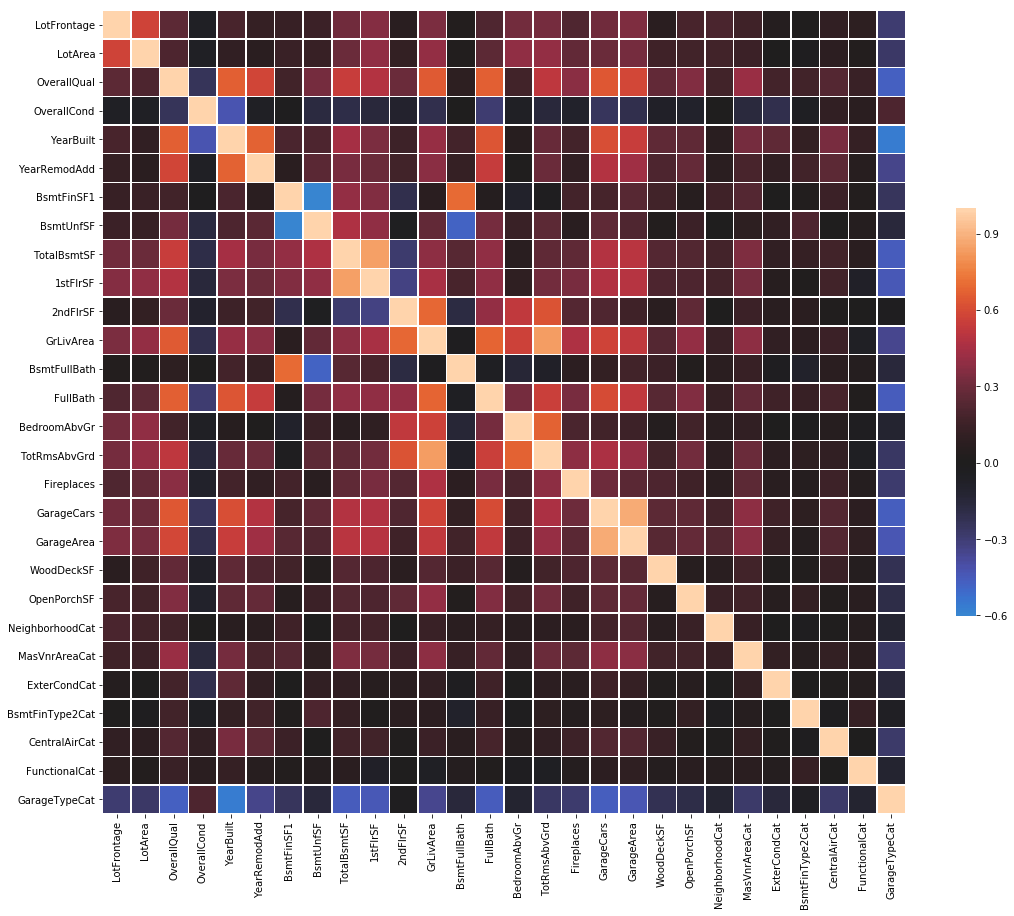

In [39]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a mask for the upper triangle
"""mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
"""
# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# cmap=cmap,   mask=mask

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

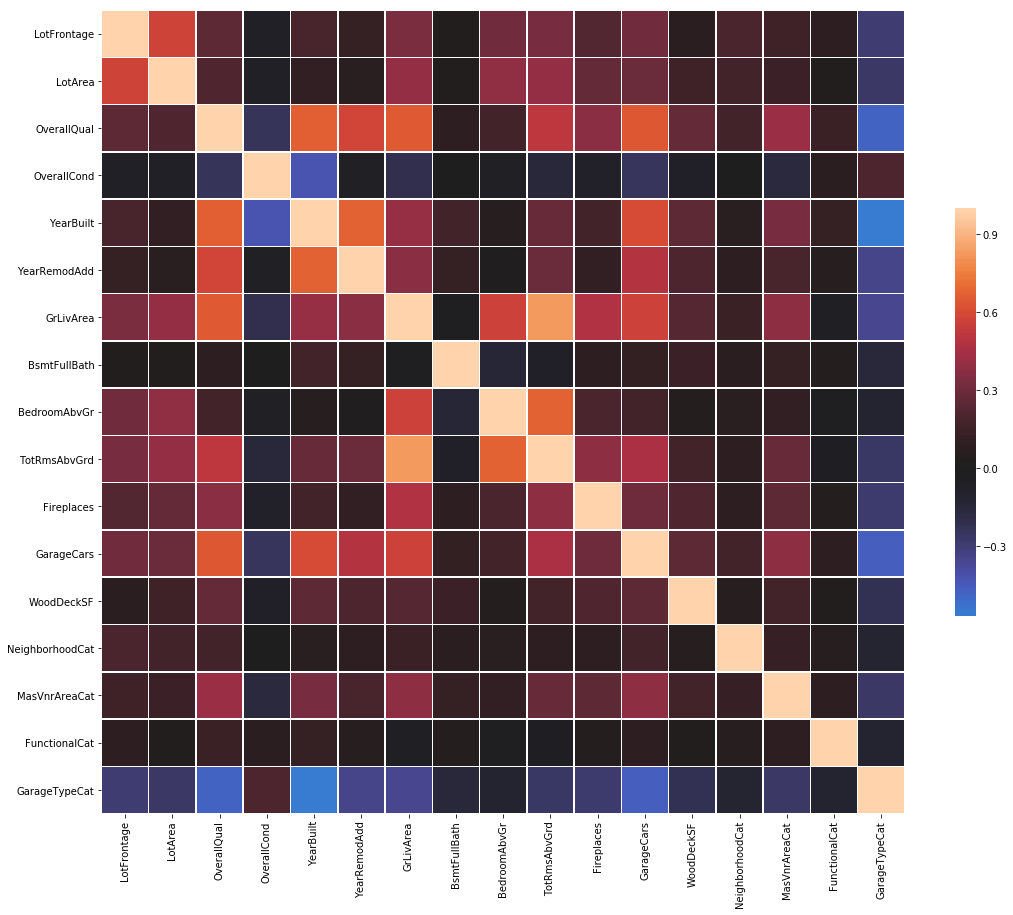

In [40]:
features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
            'YearRemodAdd','GrLivArea','BsmtFullBath','BedroomAbvGr',
            'TotRmsAbvGrd','Fireplaces','GarageCars','WoodDeckSF',
            'NeighborhoodCat','MasVnrAreaCat','FunctionalCat','GarageTypeCat']

corr = (num_df[features].corr())

f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr, vmax=1, center=0,
            
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 2.3 If you have variables with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [ ]:
# High Degree of Multicolinearity:

print(results.summary())

In [ ]:
features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
            'YearRemodAdd','GrLivArea','BsmtFullBath','BedroomAbvGr',
            'TotRmsAbvGrd','Fireplaces','GarageCars','WoodDeckSF',
            'NeighborhoodCat','MasVnrAreaCat','FunctionalCat','GarageTypeCat']

X = num_df[features]
y = num_df[target]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

Standard Error does imporve somewhat.

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [ ]:
features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
            'YearRemodAdd','GrLivArea','BsmtFullBath','BedroomAbvGr',
            'TotRmsAbvGrd','Fireplaces','GarageCars','WoodDeckSF',
            'NeighborhoodCat','MasVnrAreaCat','FunctionalCat','GarageTypeCat']

X = num_df[features]
y = num_df[target]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit(cov_type='HC3')

print(results.summary())

Standard errors appear to have gone up slightly. 

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

In [ ]:
sns.regplot(num_df['YearRemodAdd'], num_df['ln_SalesPrice'])

In [ ]:


sns.lmplot(x='YearRemodAdd', y='ln_SalesPrice', data = num_df)

In [ ]:
features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
            'YearRemodAdd','GrLivArea','BsmtFullBath','BedroomAbvGr',
            'TotRmsAbvGrd','Fireplaces','GarageCars','WoodDeckSF',
            'NeighborhoodCat','MasVnrAreaCat','FunctionalCat','GarageTypeCat']
target = 'ln_SalesPrice'



for feature in features:
    sns.lmplot(x=feature, y=target, data=num_df, scatter_kws=dict(alpha=0.2))
    plt.show()

My intuition is that yearbuilt, and garagetypecat are candidates for polynomial features. Now to check with Residplot

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

In [ ]:
for feature in features:
    sns.residplot(num_df[feature], num_df[target], lowess=True, line_kws=dict(color='r'))
    plt.show()


## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [ ]:
num_df['sqLotFrontage'] = num_df['LotFrontage']**2
num_df['sqLotArea'] = num_df['LotArea']**2
num_df['sqOverallCond'] = num_df['OverallCond']**2
num_df['sqYearBuilt'] = num_df['YearBuilt']**2
num_df['sqWoodDeckSF'] = num_df['WoodDeckSF']**2
num_df['sqGarageTypeCat'] = num_df['GarageTypeCat']**2

In [ ]:
features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
            'YearRemodAdd','GrLivArea','BsmtFullBath','BedroomAbvGr',
            'TotRmsAbvGrd','Fireplaces','GarageCars','WoodDeckSF',
            'NeighborhoodCat','MasVnrAreaCat','FunctionalCat','GarageTypeCat',
            'sqLotFrontage','sqLotArea','sqOverallCond','sqYearBuilt','sqWoodDeckSF',
            'sqGarageTypeCat']
target = ['ln_SalesPrice']

X = num_df[features]
y = num_df[target]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit(cov_type='HC3')

print(results.summary())

They actually start matching my expectation. For example Year Build has a negative coefficient, meaning that older houses cost more. Similarly, Ammenities such as fireplaces have a positive relation to salesprice. It appears that the most important factor is Overall Condition. 

##### Now to test my prediction:

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = num_df[features]
y = num_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.8,
                                                    test_size= 0.2, 
                                                    random_state=42)

model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)
    

rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error', rmse)
print('R^2 Score', r2)

That was better than my RSME best of 14 in yesterday's assignment. 

# Stretch Goals

- Research the assumptions that are required for OLS to be BLUE the "Best Linear Unbiased Estimator". You might try searching and trying to understand the conditions of what's called the Gauss-Markov Theorem.
- Research other diagnostic tests. Can you show that residuals are normally distributed graphically?
- Write a blog post about inferential modeling using linear regression.